# Representing Multi-Qubit States 

$$ |a> = a_{00}|00> + a_{01}|01> + a_{10}|10> + a_{11}|11> = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$
<br>
The measurement works the same way as 1-qubit:<br>
$$ p(|00>) = |<00|a>|^2  = |a_{00}|^2$$
<br>
Normalisation condition:<br>
$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1 $$

Consider two separate qubits<br>
$$ |a> = \begin{bmatrix} a0 \\ a1 \end{bmatrix} \space and  \space |b> = \begin{bmatrix} b0 \\ b1 \end{bmatrix} $$
We can describe collective state by kronecker product: <br>
$$ |ba> = |b> \mathop{\otimes} |a>  = \begin{bmatrix} b0a0 \\ b0a1 \\ b1a0 \\ b1a1 \end{bmatrix} $$

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

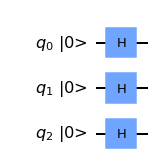

In [2]:
qc = QuantumCircuit(3)
for i in range(3):
    qc.h(i)
qc.draw('mpl', initial_state=True)

In [3]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

In [4]:
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

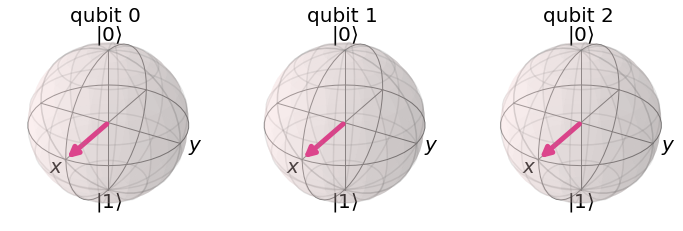

In [5]:
plot_bloch_multivector(final_state)

## Quick Exercises

1. Write down the kronecker product of the qubits:
<br>
<br>
i. |0>|1>

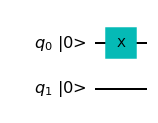

In [6]:
qc = QuantumCircuit(2)
qc.x(0)
qc.draw('mpl', initial_state=True)

In [7]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

ii. |0>|+>

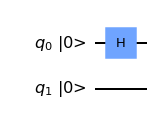

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw('mpl', initial_state=True)

In [9]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

iii. |+>|1>

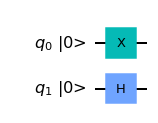

In [10]:
qc = QuantumCircuit(2)
qc.h(1)
qc.x(0)
qc.draw('mpl', initial_state=True)

In [11]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

iv. |->|+>

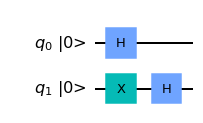

In [12]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(1)
qc.h(0)
qc.draw('mpl', initial_state=True)

In [13]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

2. Write the state: $ 1/\sqrt{2}|00> + i/\sqrt{2}|01> $  as two separate qubits.

The state $1/\sqrt{2}|00> + i/\sqrt{2}|01>$ can be writtern as 2 separate states |0> and |+i> <br>
$ |0> \mathop{\otimes} |+i> = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \mathop{\otimes} \begin{bmatrix} 1 \\ i \end{bmatrix} = \begin{bmatrix} 1 \\ i \\ 0 \\ 0 \end{bmatrix} $

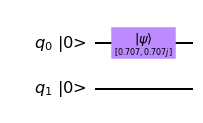

In [14]:
qc = QuantumCircuit(2)
qc.initialize([1/np.sqrt(2), 1j/np.sqrt(2)], 0)
qc.draw('mpl', initial_state=True)

In [15]:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

## Single Qubit Gates on Multi-Qubit Statevectors

we can represent the simultaneous operations (H & X) using their kronecker product:
<br>
<br>
$$ X|q1> \mathop{\otimes} H|q0> = (X \mathop{\otimes} H)|q1q0> $$
<br>
<br>
$$ X \mathop{\otimes} H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \mathop{\otimes} 1/\sqrt{2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = 1/\sqrt{2} \begin{bmatrix} 0 \mathop{\otimes} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}  & 1 \mathop{\otimes} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\\ 1 \mathop{\otimes} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} & 0 \mathop{\otimes} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \end{bmatrix} = 1/\sqrt{2} \begin{bmatrix} 0 & 0 & 1 & 1 \\ 0 & 0 & 1 & -1 \\ 1 & 1 & 0 & 0 \\ 1 & -1 & 0 & 0\end{bmatrix} = \begin{bmatrix} 0 & H \\ H & 0 \end{bmatrix} $$

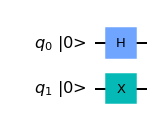

In [16]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl', initial_state=True)

In [17]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary() 

In [18]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

If we want to apply a gate to only one qubit at a time, we describe this using kronecker product with the identity matrix. e.g.
<br>
<br>
$$ X \mathop{\otimes} I  = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \mathop{\otimes} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix}  = \begin{bmatrix} 0 & I \\ I & 0 \end{bmatrix}$$

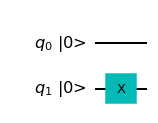

In [19]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl', initial_state=True)

In [20]:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [21]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

## Quick Exercises

1. Calculate the single qubit unitary (U) created by the sequence of gates: U = XZH. Use Qiskit's Aer simulator to check your results.
<br>
<br>
$$ U = XZH = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} 1/\sqrt{2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = 1/\sqrt{2} \begin{bmatrix} -1 & 1 \\ 1 & 1 \end{bmatrix}$$

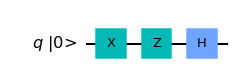

In [22]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)
qc.draw('mpl', initial_state=True)

In [23]:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary() 

In [24]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

## Multi-Qubit Gates

### The CNOT-Gate
<br>
<br>
This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is |1⟩

|   Input (t,c)    | |     Output (t,c)   |
    |---| |---|
    |       00         | |         00         |
    |       01         | |         11         |
    |       10         | |         10         |
    |       11         | |         01         |

CNOT unitary vector:-<br>
<br>
$$ CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} $$
<br>
<br>
$$ |a> = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} => CNOT(|a>) = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} $$

In [25]:
def cnot(a0=0, a1=0):
    qc = QuantumCircuit(2)
    if a0 == 1:
        qc.x(0)
    if a1 == 1:
        qc.x(1)
    qc.cx(0, 1)
    svsim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    qobj = assemble(qc)
    final_state = svsim.run(qobj).result().get_statevector()
    return final_state

In [26]:
print("0th bit: {}, 1st bit: {}".format(0, 0))
array_to_latex(cnot(0, 0), prefix="\\text{Statevector = }")

0th bit: 0, 1st bit: 0


<IPython.core.display.Latex object>

In [27]:
print("0th bit: {}, 1st bit: {}".format(0, 1))
array_to_latex(cnot(0, 1), prefix="\\text{Statevector = }")

0th bit: 0, 1st bit: 1


<IPython.core.display.Latex object>

In [28]:
print("0th bit: {}, 1st bit: {}".format(1, 0))
array_to_latex(cnot(1, 0), prefix="\\text{Statevector = }")

0th bit: 1, 1st bit: 0


<IPython.core.display.Latex object>

In [29]:
print("0th bit: {}, 1st bit: {}".format(1, 1))
array_to_latex(cnot(1, 1), prefix="\\text{Statevector = }")

0th bit: 1, 1st bit: 1


<IPython.core.display.Latex object>

## Entangled States

Let's create state : $ 1/\sqrt{2}(|00> + |11>)$

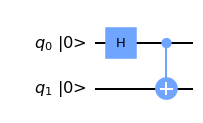

In [30]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl', initial_state=True)

In [31]:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
final_state = result.get_statevector()

In [32]:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

$ 1/\sqrt{2}(|00> + |11>)$ is one of the Bell state. <br>
We can see that this state has 50% probability of being measured in the state |00⟩,<br>
and 50% chance of being measured in the state |11⟩. <br>
Most interestingly, it has a 0% chance of being measured in the states |01⟩ or |10⟩. <br>

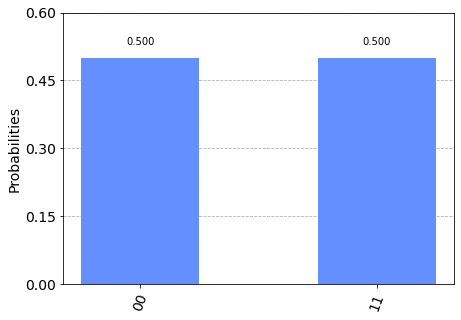

In [33]:
plot_histogram(result.get_counts())

This combined state cannot be written as two separate qubit states. <br>
Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition.<br>
For example, if we measured the top qubit and got the state |1⟩,the collective state of our qubits changes like so:
<br>
$$ 1/\sqrt{2}(|00> + |11>)  \underrightarrow{measurement}  |11> $$
<br>
It’s important to note that the measurement result is random, and the measurement statistics of one qubit are not affected by any operation on the other qubit. <br>
Because of this, there is no way to use shared quantum states to communicate. This is known as the no-communication theorem. <br>

## Visualizing Entangled States 

Entangled state cannot be written as 2 separate qbits. This means we lose information when we try to plot state on separate bloch spheres.

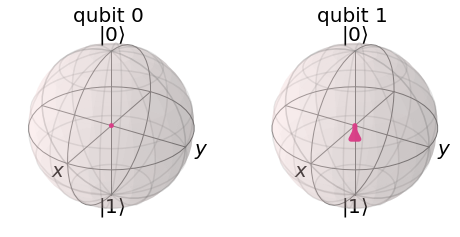

In [34]:
plot_bloch_multivector(final_state)

The position of the Bloch vector along an axis nicely corresponds to the expectation value of measuring in that basis. <br>
1. There is no single-qubit measurement basis for which a specific measurement is guaranteed for entangled state.
2.  We cannot distinguish between different entangled states.
<br>
e.g.  the two states:
$$ 1/\sqrt{2}(|00>+|11>) and 1/\sqrt{2}(|01>+|10>) $$
<br>
will both look the same on these separate Bloch spheres, despite being very different states with different measurement outcomes.

## Qsphere Visualization

In [35]:
from qiskit.visualization import plot_state_qsphere

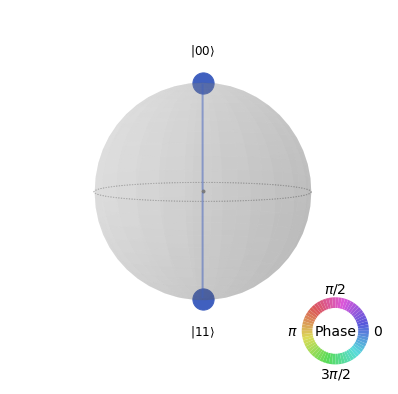

In [36]:
plot_state_qsphere(final_state)

### Exercise

1. Create a quantum circuit that produces the Bell state: 1/√2(|01⟩+|10⟩). Use the statevector simulator to verify your result.

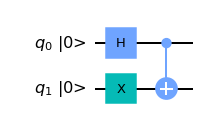

In [37]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.draw('mpl', initial_state=True)

In [38]:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
final_state = result.get_statevector()

In [39]:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

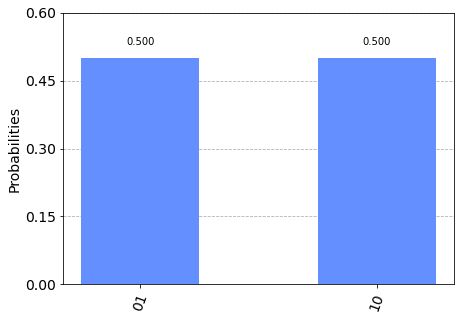

In [40]:
plot_histogram(result.get_counts())

2. The circuit you created in question 1 transforms the state |00⟩ to 1/√2(|01⟩+|10⟩), calculate the unitary of this circuit using Qiskit's simulator. Verify this unitary does in fact perform the correct transformation.

In [41]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)

In [42]:
qc.save_unitary()
qobj = assemble(qc)
result = svsim.run(qobj).result()
unitary = result.get_unitary()

In [43]:
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }")

<IPython.core.display.Latex object>

Manual verification by taking dot product of unitary matrix with state |00>

In [44]:
np.dot(unitary, [1, 0, 0, 0])

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [45]:
import qiskit.tools.jupyter
%qiskit_version_table